### CHAPTER 4 : KURTOSIS ANALYSIS (UNDERSTANDING THE SHAPE OF DATA DISTRIBUTIONS)

#### Leptokurtic, Mesokurtic & Platykurtic

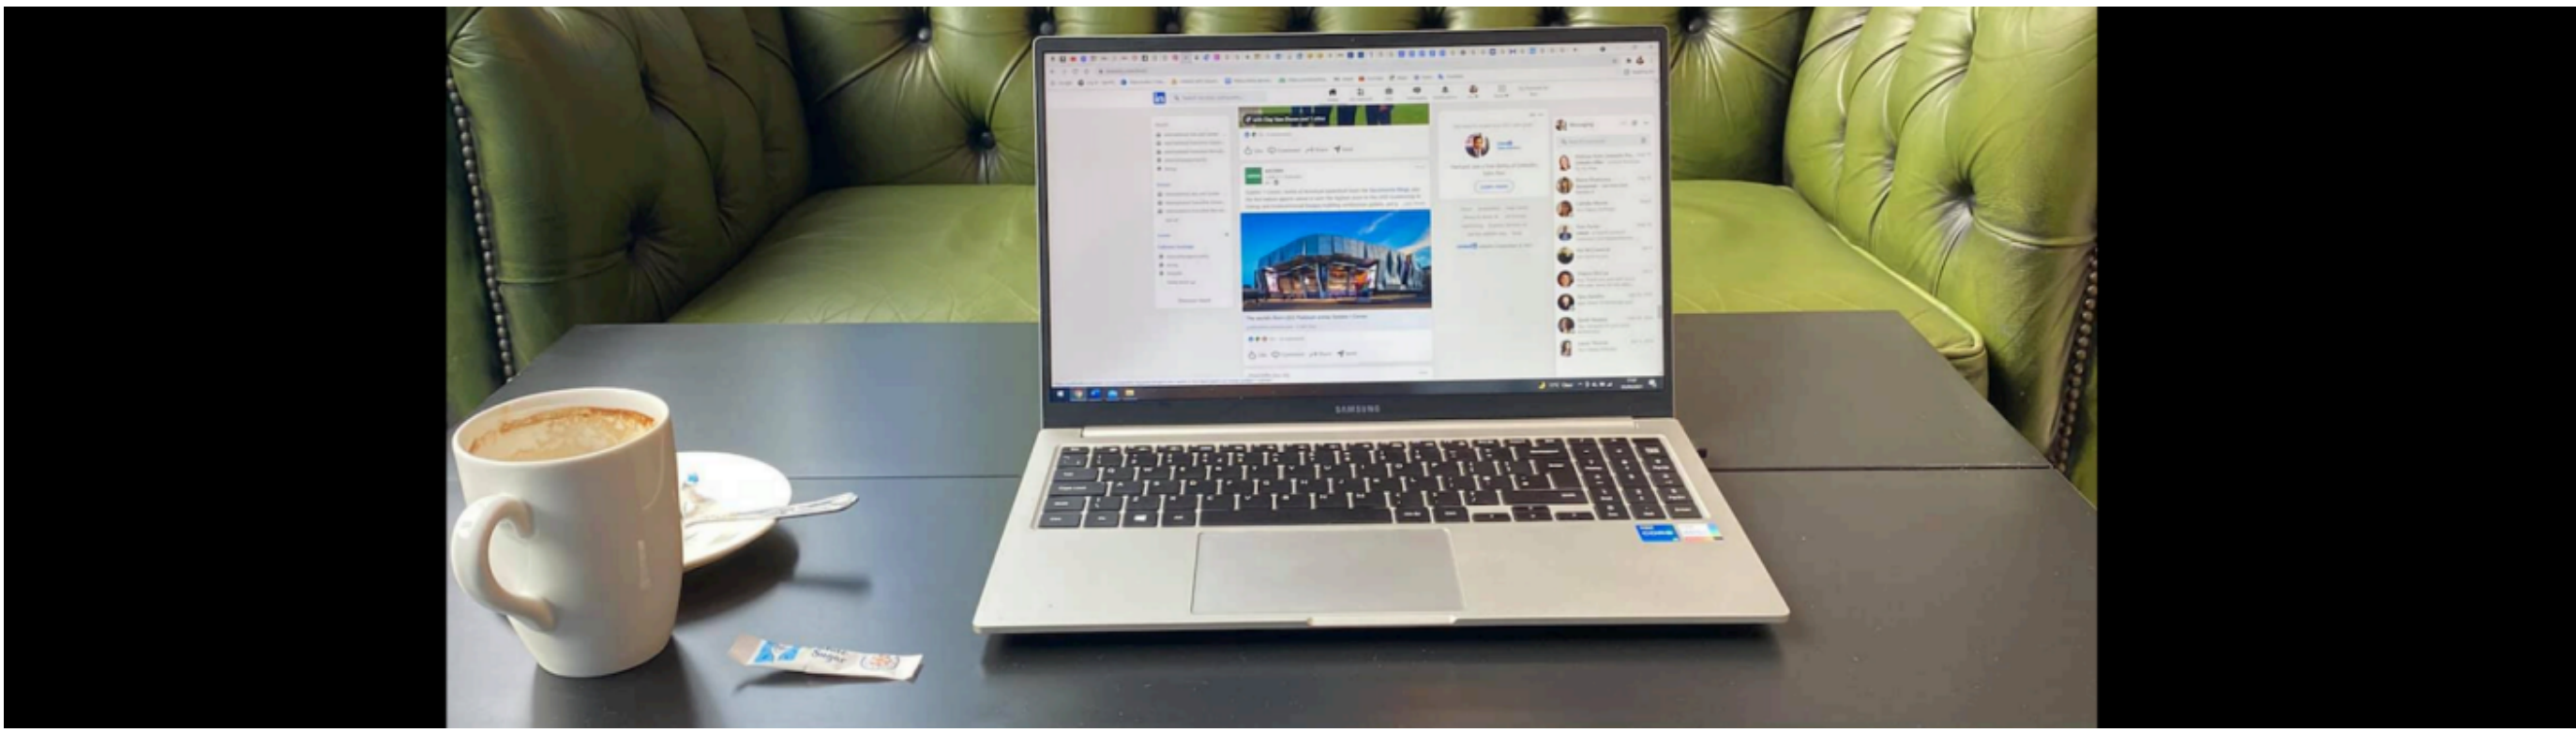

### HEMANT THAPA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as mt
import statistics as st
import statsmodels.api as sm
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from scipy.stats import norm
from scipy.stats import gamma

### <font color = 'Blue'>Probability Density Function

A Probability Distribution Function (PDF), also known as a Probability Density Function, is a fundamental concept in probability and statistics. It is used to describe and model the probability distribution of a continuous random variable. In simple terms, a PDF provides a way to understand how the values of a continuous random variable are spread out or distributed across its possible range.

#### Continuous Random Variable: 

A PDF is typically associated with a continuous random variable. A continuous random variable is one that can take on any real value within a certain range. For example, the height of individuals in a population or the time it takes for an event to occur are continuous random variables because they can have infinitely many possible values within a range.

#### Probability Density: 

The PDF defines a probability density for each possible value of the continuous random variable. The density represents the likelihood of the random variable taking on a specific value. However, unlike the probability of a discrete random variable, which is a specific value for each possible outcome, the probability of a continuous random variable at a specific point is technically zero. Instead, we use the density to measure the probability over a range of values.

#### Area under the Curve: 

The PDF is often represented as a curve, and the total area under the curve within its entire range is equal to 1. This means that the probability of the random variable taking any value within its range is 1, which is a fundamental property of probability.

#### Probability within an Interval: 

To find the probability of the continuous random variable falling within a specific interval, you calculate the area under the curve within that interval. In mathematical terms, you integrate the PDF over the interval. The probability of the random variable being within that interval is the result of this integration.

#### Properties of PDFs: 

The PDF is always non-negative, meaning it is greater than or equal to zero for all possible values of the random variable.

The integral of the PDF over its entire range is equal to 1.

The PDF can take various shapes and forms, depending on the specific distribution it represents (e.g., normal distribution, exponential distribution, uniform distribution).

#### Common examples of PDFs include:

1. Normal Distribution: epresented by the familiar bell-shaped curve, it is often used to model real-world phenomena where values cluster around a central mean.

2. Exponential Distribution: Used to model the time between events in certain processes, such as the time between arrivals of customers at a service center.

3. Uniform Distribution: Represents a situation where all values within a certain range are equally likely.

In [2]:
np.random.seed(42)

In [3]:
# Normal Distribution
mean = 0
std_dev = 1
num_samples = 1000
normal_data = np.random.normal(mean, std_dev, num_samples)

In [4]:
# Exponential Distribution
lambda_param = 0.5  # Lambda (rate parameter)
exponential_data = np.random.exponential(1 / lambda_param, num_samples)

In [5]:
# Uniform Distribution
low = 0
high = 10
uniform_data = np.random.uniform(low, high, num_samples)


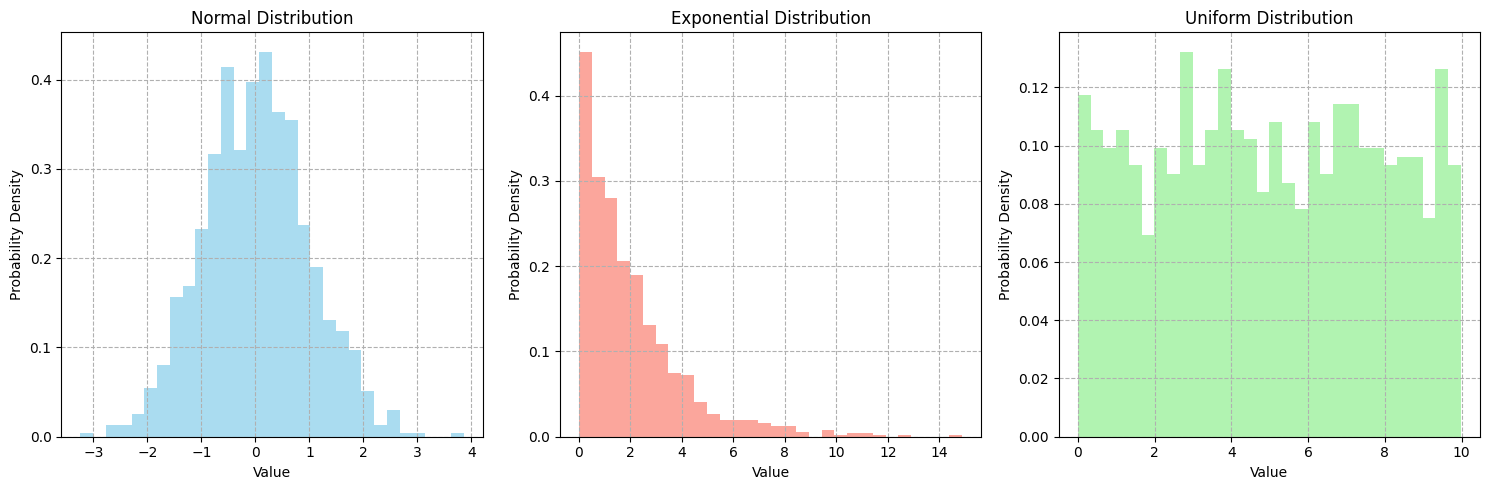

In [6]:
plt.figure(figsize=(15, 5))

# Normal Distribution Plot
plt.subplot(131)
plt.hist(normal_data, bins=30, density=True, color='skyblue', alpha=0.7)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True, ls='--')

# Exponential Distribution Plot
plt.subplot(132)
plt.hist(exponential_data, bins=30, density=True, color='salmon', alpha=0.7)
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True, ls='--')

# Uniform Distribution Plot
plt.subplot(133)
plt.hist(uniform_data, bins=30, density=True, color='lightgreen', alpha=0.7)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True, ls='--')
plt.tight_layout()
plt.show()

In [7]:
class ProbabilityDensityFunction:
    def __init__(self, data, column_name, num_bins=30):
        self.data = data
        self.column_name = column_name
        self.num_bins = num_bins

    def fit(self, distribution='normal'):
        if distribution == 'normal':
            self.fit_normal_distribution()
        elif distribution == 'gamma':
            self.fit_gamma_distribution()
        elif distribution == 'exponential':
            self.fit_exponential_distribution()
        elif distribution == 't':
            self.fit_t_distribution()
        elif distribution == 'uniform':
            self.fit_uniform_distribution()
        else:
            print("Invalid distribution type. Supported distributions: normal, gamma, exponential, t, uniform")

    def fit_normal_distribution(self):
        mu = mean = np.mean(self.data[self.column_name])
        sigma = std_dev = np.std(self.data[self.column_name])
        x = np.linspace(min(self.data[self.column_name]), max(self.data[self.column_name]), 100)
        pdf_values = []
        normalization_constant = 1.0 / (sigma * np.sqrt(2 * np.pi))
        for i in x:
            exponent = -((i - mu)**2) / (2 * sigma**2)
            pdf_value = normalization_constant * np.exp(exponent)
            pdf_values.append(pdf_value)

        plt.figure(figsize=(8, 6))
        plt.hist(self.data[self.column_name], bins=self.num_bins, alpha=0.6, color='b', label='Histogram', density=True)
        plt.plot(x, pdf_values, 'r-', linewidth=2, label='Bell Curve (Normal Distribution)')
        plt.title(self.column_name)
        plt.grid(True, ls='--')
        plt.ylabel('Probability Density')
        plt.xlabel('Values')
        plt.legend()
        plt.show()

### <font color='blue'>What is difference Between Skewness and Kurtosis ?

Imagine you have a graph that represents how often different values appear in your data. If this graph is perfectly balanced and looks the same on both sides of the middle point, it's considered symmetric. It means that the data is evenly distributed.

However, if the graph leans more to one side or the other, it's asymmetric or skewed. This skewness indicates that one side of the data has more extreme values or outliers than the other side. In simple terms, skewness helps us spot when data isn't evenly spread out and when one side has more unusual or extreme occurrences than the other side.

#### 1. Symmetric Distribution:

Think of a symmetric distribution as a perfectly balanced see-saw. It's like having equal weights on both sides, so it stays level.

In this type of distribution, the center point (like the pivot of a see-saw) is where the Mean, Median, and Mode all meet. 

They're all at the same spot.So, in a symmetric distribution, there's no leaning or tilting to one side. Everything is nicely balanced.

#### 2. Asymmetric (Skewed) Distribution:

Now, imagine an uneven see-saw where one side has more weight than the other. It tilts to one side.

In an asymmetric distribution, the spread of values is different on both sides of the center point. This means the data is stretched or skewed towards one side.

Here, the Mean, Median, and Mode are not at the same point; they are at different places.
    
So, in an asymmetric (skewed) distribution, there's a noticeable tilt or imbalance in the data, making it look stretched or lopsided.

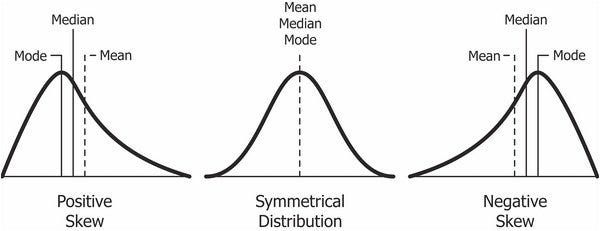

#### 2.1 Positive Skewness:

Imagine a group of people lined up by their height. Now, picture that most people in the line are relatively short, but there are a few very tall individuals at the end.

This situation represents positive skewness. The data is stretched towards the higher values (the tall people), and the right tail of the distribution is longer than the left.

In other words, positive skewness means there are more occurrences of lower values, but a few unusually high values pull the distribution to the right.

#### 2.2 Negative Skewness:

Now, picture the opposite scenario. You have the same line of people, but most of them are quite tall, and there are a few very short individuals at the end.

This situation represents negative skewness. The data is stretched towards the lower values (the short people), and the left tail of the distribution is longer than the right.

In other words, negative skewness means there are more occurrences of higher values, but a few unusually low values pull the distribution to the left.

### Karl Pearson's Coefficient of Skewness

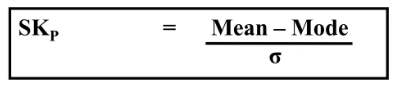

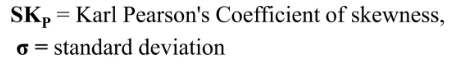

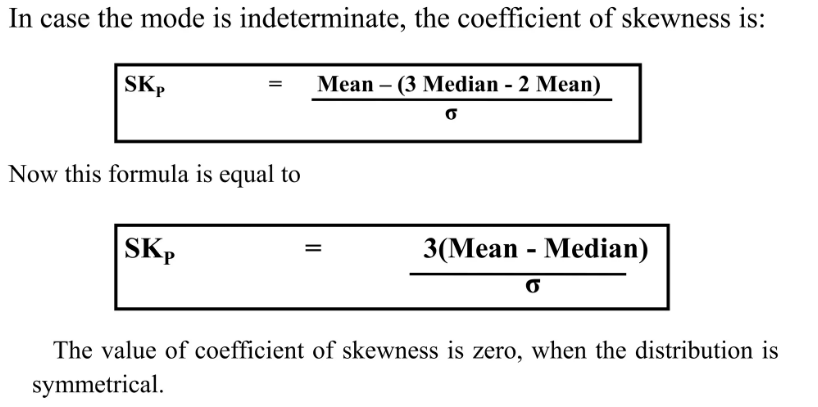

In [8]:
class KarlPearsonCoefficient:
    """
    Class for calculating and interpreting skewness of a data column.

    Parameters:
    - data: DataFrame containing the data.
    - column_name: Name of the column for which skewness will be calculated.

    Note: If this value is between:
    · -0.5 and 0.5, the distribution of the value is almost symmetrical
    · -1 and -0.5, the data is negatively skewed, and if it is between 0.5 to 1, the data is positively skewed.
    · If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed.
    """
    def __init__(self, data, column_name):
        self.data = data
        self.column_name = column_name

    def calculate_skewness(self):
        #skewness using Pearson’s median skewness formula
        mean = self.data[self.column_name].mean()
        median = self.data[self.column_name].median()
        mode = self.data[self.column_name].mode().iloc[0]  # Get the first mode if it exists
        print('Mean: ',mean)
        print('Median: ',median)
        print('Mode: ',mode)

        #skewness using the Pearson's median formula
        pearson_skewness = (3 * (mean - median)) / self.data[self.column_name].std()
        return pearson_skewness

    def interpret_skewness(self, skewness_value):
        #skewness based on your conditions
        if skewness_value > 1:
            skewness_result = "Highly positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif 0.5 <= skewness_value <= 1:
            skewness_result = "Positively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif skewness_value < -1:
            skewness_result = "Highly negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        elif -1 <= skewness_value <= -0.5:
            skewness_result = "Negatively skewed"
            print("Interpretation of skewness:", skewness_result)
        else:
            skewness_result = "No skew (symmetric distribution)"
            print("Interpretation of skewness:", skewness_result)

        return skewness_result

    def analyse_skewness(self):
        #skewness using Pearson's median skewness formula
        pearson_skewness = self.calculate_skewness()

        # Interpret the skewness
        self.interpret_skewness(pearson_skewness)

        print(f'Pearson Skewness : {pearson_skewness}')

### <font color='blue'> What is Kurtosis ?

Think of kurtosis as a way to understand how "pointy" or "flat" a group of data points is. It's like comparing a hill (representing your data) to a standard hill shape (a normal curve).

If the hill (data) is much pointier than the standard hill, it has high kurtosis. This means most data points are clustered around the center, and there are some really extreme values on the edges.

If the hill is flatter and more like the standard hill, it has low kurtosis. This means data points are more evenly spread out, and there are fewer extreme values.

### <font color='blue'> Types of kurtosis

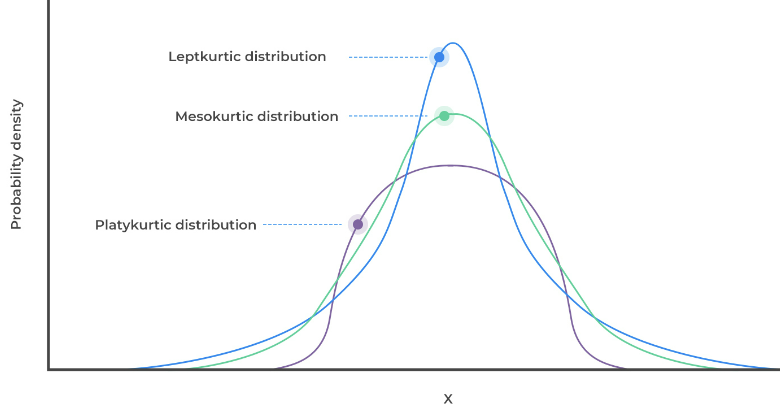

#### 1. Leptokurtic

Shape Description: Leptokurtic distributions are characterized by a higher peak and fatter tails compared to a normal distribution. The data points cluster more tightly around the mean along the x-axis.

Kurtosis: The coefficient of kurtosis for a leptokurtic distribution is typically greater than 3.

Interpretation: In financial analysis, a leptokurtic distribution suggests that small changes or fluctuations are less common because historical values tend to be concentrated around the mean. However, it also implies that there are occasional large fluctuations represented by the fat tails. These large fluctuations can signify higher risk.

#### 2. Platykurtic

Shape Description: Platykurtic distributions have widely dispersed data points along the x-axis, resulting in a lower peak compared to a normal distribution. The data points are less clustered around the mean.

Kurtosis: The coefficient of kurtosis for a platykurtic distribution is typically less than 3.

Interpretation: In the context of financial returns, platykurtic distributions indicate that major fluctuations are less common compared to leptokurtic distributions. While fewer major fluctuations may suggest lower risk, it's essential to note that fluctuations represent the riskiness of an asset. Thus, platykurtic returns are generally considered less risky than leptokurtic returns.

#### 3. Mesokurtic

Shape Description: Mesokurtic distributions closely resemble the shape of a normal distribution. The data distribution appears largely normal, with a bell-shaped curve.

Kurtosis: The coefficient of kurtosis for a mesokurtic distribution is typically close to 3.

Interpretation: Mesokurtic distributions are often associated with a balanced level of risk. They exhibit a level of volatility and fluctuation that is neither excessively high (as in leptokurtic distributions) nor excessively low (as in platykurtic distributions). In practical terms, this suggests a relatively moderate level of risk and predictability in financial data.

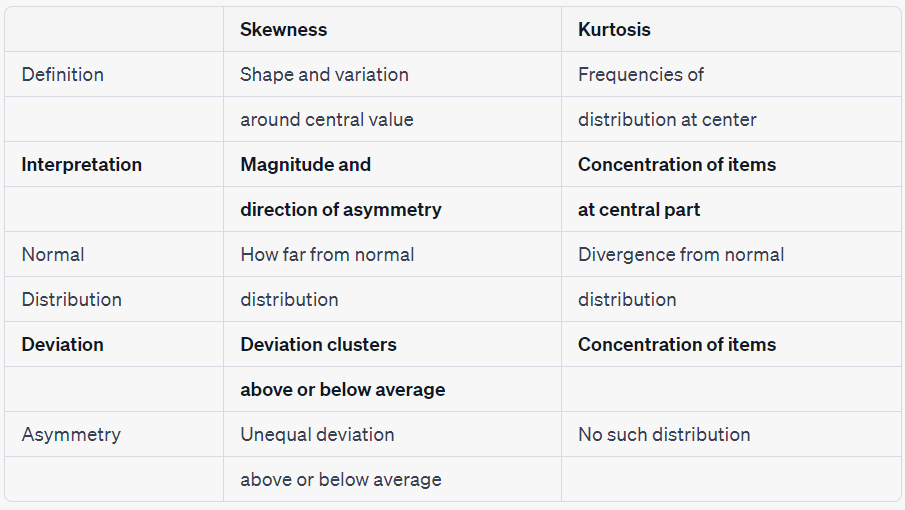

### <font color='blue'> Measures of Sample Skewness and Kurtosis

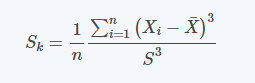

X: Sample mean

S: Sample standard deviation

n: Number of observations

Positive value indicates positive skewness. A ‘zero’ value indicates that the data is not skewed. Lastly, a negative value indicates negative skewness or rather a negatively skewed distribution.

### <font color='blue'> Sample Kurtosis

Excess kurtosis is always measured relative to the kurtosis of a normal distribution, which is 3. 

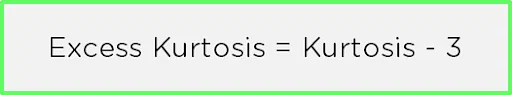

Less than 3, it's platykurtic.

Greater than 3, it's leptokurtic.

Very close to 3, it's mesokurtic.

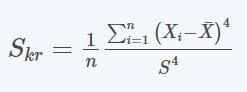

#### Positive excess kurtosis indicates a leptokurtic distribution. A zero value indicates a mesokurtic distribution. Lastly, a negative excess kurtosis represents a platykurtic distribution.

### <font color='blue'> 1. Zeroth Moment (Mean or Expectation):

The zeroth moment, often referred to as the mean or expectation, represents the central tendency of a dataset.

For a continuous random variable X, the mean (μ) is calculated as the integral of X times its probability density function (PDF) over the entire range of values.

For a discrete random variable X, the mean is calculated as the sum of each value multiplied by its probability.

### <font color='blue'> 2. First Moment (Variance):

The first moment, also known as variance, quantifies the spread or dispersion of the data points around the mean.

Variance (σ²) is calculated as the expected value of the squared differences between each data point and the mean.

Standard deviation (σ) is the square root of the variance and provides a measure of the spread in the same units as the data.

### <font color='blue'> 3. Second Moment (Skewness):

The second moment, known as skewness, measures the asymmetry of the data distribution.

Positive skewness indicates a longer right tail, while negative skewness indicates a longer left tail relative to the mean.

### <font color='blue'> 4. Third Moment (Kurtosis):

The third moment, referred to as kurtosis, describes the tailedness or the degree of outliers in the data distribution.

Positive kurtosis (leptokurtic) indicates heavier tails and more extreme values, while negative kurtosis (platykurtic) suggests lighter tails and fewer extreme values compared to a normal distribution.

### <font color='blue'> 5. Fourth Moment (Excess Kurtosis):

The fourth moment, also known as excess kurtosis, is another measure of the tailedness or the degree of outliers in a data distribution.

Positive excess kurtosis (leptokurtic) indicates that the distribution has heavier tails and more extreme values than a normal distribution. This suggests that the data has more outliers and is more peaked around the mean.

Negative excess kurtosis (platykurtic) indicates that the distribution has lighter tails and fewer extreme values than a normal distribution. This suggests that the data has fewer outliers and is less peaked around the mean.

A normal distribution has an excess kurtosis value of 0 (referred to as mesokurtic), and deviations from this value indicate the degree of tailedness or peakedness in the distribution.

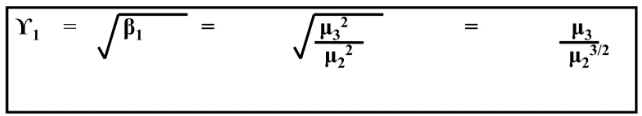

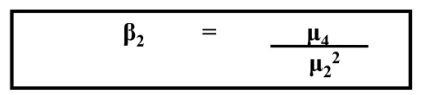

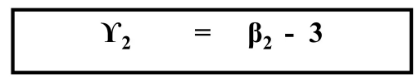

### <font color='blue'> Beta Distribution and Skewness:

Beta Distribution Parameters: The beta distribution is a continuous probability distribution defined on the interval [0, 1]. It has two shape parameters, typically denoted as α (alpha) and β (beta).

Skewness in Beta Distribution: The skewness of the beta distribution depends on the values of these shape parameters:

Right-Skewed (Positively Skewed): When α > β, the distribution is right-skewed. This means that the tail on the right side (higher values) is longer or heavier.

Left-Skewed (Negatively Skewed): When α < β, the distribution is left-skewed. This means that the tail on the left side (lower values) is longer or heavier.

Degree of Skewness: The degree of skewness in the beta distribution is influenced by the specific values of α and β chosen for a particular distribution.

Special Case - Beta(1, α): When β is equal to 1 (β = 1), it means that one of the shape parameters is fixed at 1, and the distribution simplifies to the Beta(1, α) distribution with the probability density function (PDF):

#### f(x; α, 1) = α * x^(α-1), for 0 <= x <= 1

This distribution is sometimes referred to as the Pareto distribution.

### <font color='blue'> Gamma Distribution and Skewness:

Gamma Distribution Parameters: The gamma distribution is a separate family of probability distributions commonly used to model positive-valued data and waiting times. It also has two shape parameters, typically denoted as α (alpha) and β (beta).

No Direct Skewness in Gamma: Unlike the beta distribution, the gamma distribution is not directly associated with skewness. It represents a family of distributions for positive values.

Special Case - Exponential(β): When α is equal to 1 (α = 1) in the gamma distribution, it means that one of the shape parameters is fixed at 1, and the distribution simplifies to the Exponential(β) distribution with the probability density function (PDF):

#### f(x; 1, β) = (1/β) * e^(-x/β), for x >= 0

This distribution represents the exponential distribution with parameter β and is a special case of the gamma distribution with α = 1.

### <font color='blue'> Pareto Distribution:

The Pareto distribution is a probability distribution often used to describe phenomena where a small number of elements (e.g., individuals, businesses, products) account for a large proportion of the total. 

### f(x; α) = α / x^(α+1), for x >= 1

α (Alpha): α is a positive parameter of the Pareto distribution. It represents the shape or tail index of the distribution.

When α is relatively small, the distribution has a heavy right tail, indicating that a small number of elements have a disproportionately large impact.

When α is relatively large, the distribution has a lighter right tail, suggesting that outcomes are more evenly distributed.

x:  x is the random variable, and it represents the value we are interested in (e.g., income, wealth, sales). x must be greater than or equal to 1 because the distribution is only defined for positive values.

### Explaination 

Small α (e.g., α < 1): In this case, the distribution has a very heavy right tail, implying that a small fraction of elements account for most of the observed values. This is often seen in income distributions, where a small percentage of people have most of the wealth.

Large α (e.g., α > 1): As α increases, the right tail becomes less heavy, suggesting that outcomes are more evenly distributed. In practical terms, this means that a larger portion of elements contributes to the total.

α = 1 (Special Case): When α equals 1, it represents a specific case known as the Pareto Type I distribution. In this case, the distribution has a heavy right tail but follows a simpler mathematical form:

#### f(x; 1) = 1 / x^2, for x >= 1

This distribution is often used to describe situations where extreme values are prevalent but not as extreme as when α is smaller.

In [9]:
#the range 
x = np.linspace(1, 10, 400)  

In [10]:
# Parameters for the Pareto distribution (α)
alpha_values = [1, 2, 3]  

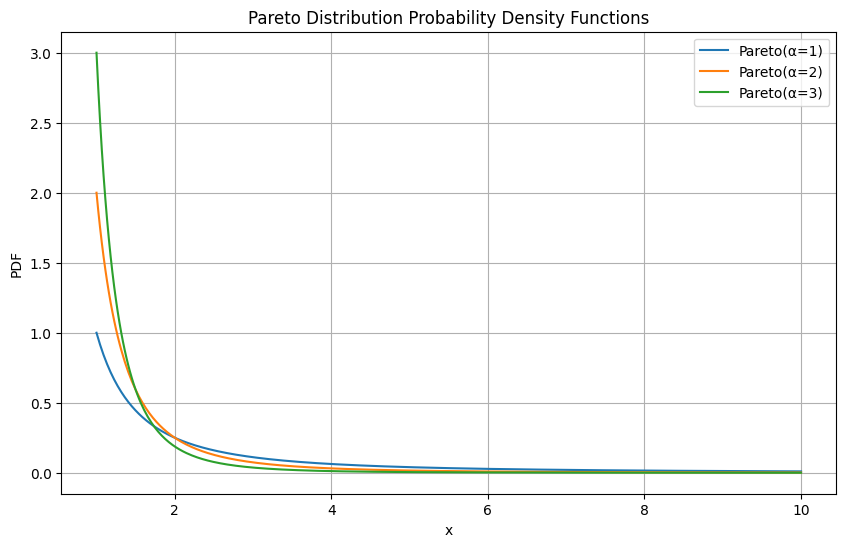

In [11]:
plt.figure(figsize=(10, 6))  
for alpha in alpha_values:
    pareto_pdf = alpha / x**(alpha + 1)
    plt.plot(x, pareto_pdf, label=f'Pareto(α={alpha})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Pareto Distribution Probability Density Functions')
plt.legend()
plt.grid(True)
plt.show()

#### Explaination

Shape Variations with α: The plot displays multiple curves, each corresponding to a different α value. These curves represent different Pareto distributions.


#### Effect of α on Shape:

As α increases, the shape of the Pareto distribution changes.

For α = 1: The Pareto distribution with α = 1 (Pareto(1)) is also known as the Pareto Type I distribution. It has a relatively steep decline as x increases, indicating that a few elements have a disproportionately large impact. This distribution is characterized by a heavy tail.

For α = 2: The Pareto distribution with α = 2 (Pareto(2)) has a somewhat less steep decline compared to α = 1. It still exhibits a heavy tail, but the distribution is not as extreme as when α = 1.

For α = 3: The Pareto distribution with α = 3 (Pareto(3)) has an even less steep decline, resulting in a distribution that is less heavy-tailed than the previous ones. As α increases, the distribution becomes more concentrated toward the lower values of x, indicating a more even distribution of outcomes.


In [12]:
x = np.linspace(0, 20, 400) 

In [13]:
# Parameters for the Gamma distribution (α values)
alpha_values = [1, 2, 3] 

In [14]:
# Fixed scale parameter (β)
beta = 2  

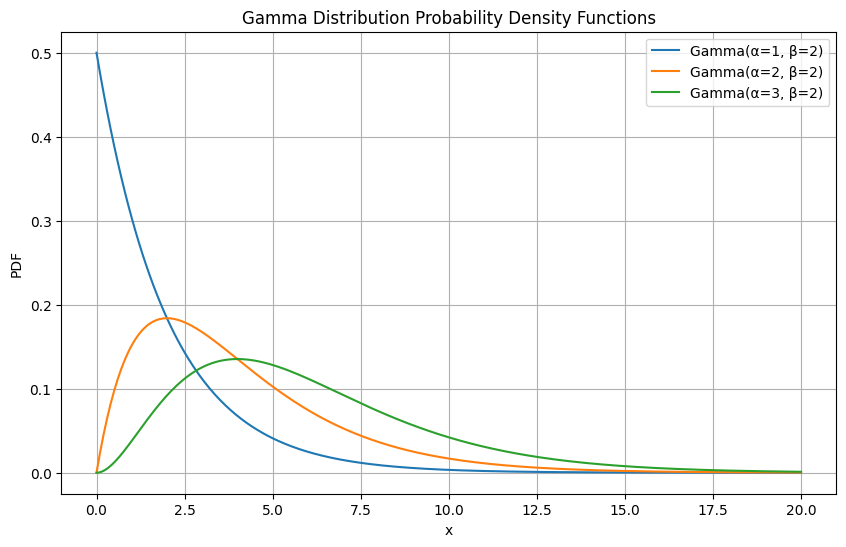

In [15]:
plt.figure(figsize=(10, 6))  
for alpha in alpha_values:
    gamma_pdf = gamma.pdf(x, a=alpha, scale=beta)
    plt.plot(x, gamma_pdf, label=f'Gamma(α={alpha}, β={beta})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Gamma Distribution Probability Density Functions')
plt.legend()
plt.grid(True)
plt.show()

#### Explaination

Shape Variations with α: As you look at the plot, you can observe that there are multiple curves, each corresponding to a different α value. The curves represent different Gamma distributions.

#### Effect of α on Shape:

Higher α Values (e.g., α = 3): The Gamma distribution with a higher α value, such as α = 3, has a more pronounced peak and a narrower shape. This indicates that the distribution is more concentrated around its mean, and values farther from the mean are less likely. In other words, the distribution becomes less spread out and more "peaked."

Intermediate α Values (e.g., α = 2): The Gamma distribution with an intermediate α value, such as α = 2, has a moderately pronounced peak and a somewhat broader shape compared to α = 3. It is less concentrated around its mean than the distribution with α = 3 but more concentrated than the one with α = 1.

Lower α Values (e.g., α = 1): The Gamma distribution with a lower α value, such as α = 1, has a broader, flatter shape with a less pronounced peak. It is relatively spread out, and values farther from the mean are more likely. In this case, the distribution is closer to an exponential distribution.

In [16]:
alpha_values = [1, 2, 3] 
beta_values = [1, 2, 3]  

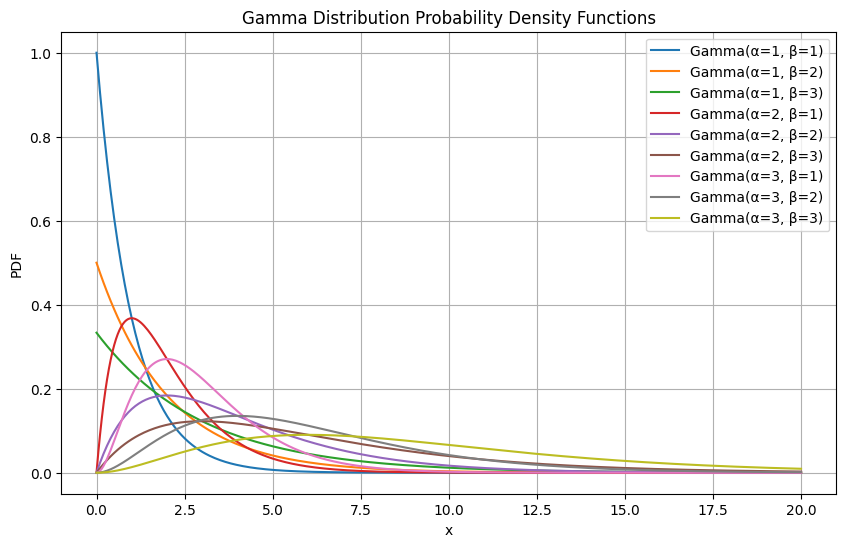

In [17]:
plt.figure(figsize=(10, 6)) 
for alpha in alpha_values:
    for beta in beta_values:
        gamma_pdf = gamma.pdf(x, a=alpha, scale=beta)
        plt.plot(x, gamma_pdf, label=f'Gamma(α={alpha}, β={beta})')
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Gamma Distribution Probability Density Functions')
plt.legend()
plt.grid(True)
plt.show()

#### Explanation:

The Gamma distribution is characterized by two parameters, α and β.

The α parameter (shape parameter) determines the shape of the distribution.

The β parameter (scale parameter) determines the scale or spread of the distribution.

In the chart, each curve represents a different combination of α and β values.

#### As you look at the chart:

You can see how changing the α value affects the shape of the distribution. Higher α values lead to distributions with more pronounced peaks and less variability.

You can also observe the impact of changing the β value. Higher β values result in distributions that are more spread out, while lower β values create distributions that are more 
concentrated near the peak.

In [18]:
class KutrosisCalculator:
    def __init__(self, data, columns):
        self.data = data
        self.columns = columns

    def mean(self):
        means = {}
        for i in self.columns:
            mean = sum(self.data[i]) / len(self.data[i])
            means[i] = mean
        return means

    def median(self):
        medians = {}
        for i in self.columns:
            sorted_data = sorted(self.data[i])
            n = len(sorted_data)
            if n % 2 == 0:
                median = (sorted_data[n // 2 - 1] + sorted_data[n // 2]) / 2
            else:
                median = sorted_data[n // 2]
            medians[i] = median
        return medians

    def mode(self):
        modes = {}
        for i in self.columns:
            data_counts = {}
            for j in self.data[i]:
                if j in data_counts:
                    data_counts[j] += 1
                else:
                    data_counts[j] = 1

            max_count = max(data_counts.values())
            mode_values = [x for x, y in data_counts.items() if y == max_count]
            if len(mode_values) == 1:
                modes[i] = mode_values[0]
            else:
                modes[i] = "No unique Mode"
        return modes
        
    def standard_deviation(self):
        std_devs = {}
        for i in self.columns:
            n = len(self.data[i])
            mean = self.mean()[i]
            squared_difference_sum = sum((x - mean) ** 2 for x in self.data[i])
            std_dev = (squared_difference_sum / (n - 1)) ** 0.5
            std_devs[i] = std_dev
        return std_devs

    def skewness(self):
        skewness_values = {}
        for i in self.columns:
            n = len(self.data[i])
            mean = self.mean()[i]
            std_dev = self.standard_deviation()[i]
            skewness = (sum((x - mean) ** 3 for x in self.data[i]) / (n * std_dev ** 3))
            skewness_values[i] = skewness
        return skewness_values

    def kurtosis(self):
        kurtosis_values = {}
        kurtosis_descs = {}
        for i in self.columns:
            n = len(self.data[i])
            mean = self.mean()[i]
            variance = sum((x - mean) ** 2 for x in self.data[i]) / (n - 1)
            fourth_moment = sum((x - mean) ** 4 for x in self.data[i]) / n
            kurtosis = (fourth_moment / (variance ** 2)) - 3
            kurtosis_values[i] = kurtosis

            if kurtosis > -0.5 and kurtosis < 0.5:
                kurtosis_desc = "Mesokurtic (Normal)"
            elif kurtosis > 0:
                kurtosis_desc = "Leptokurtic (Fat-Tailed)"
            else:
                kurtosis_desc = "Platykurtic (Thin-Tailed)"
            kurtosis_descs[i] = kurtosis_desc

        results_df = pd.DataFrame({
            'Column': self.columns,
            'Mean': [self.mean()[i] for i in self.columns],
            'Median': [self.median()[i] for i in self.columns],
            'Mode': [self.mode()[i] for i in self.columns],
            'Standard Deviation': [round(self.standard_deviation()[i], 4) for i in self.columns],
            'Skewness': [round(self.skewness()[i], 4) for i in self.columns],
            'Kurtosis': [round(kurtosis_values[i], 4) for i in self.columns],
            'Kurtosis Description': [kurtosis_descs[i] for i in self.columns]
        })

        return results_df


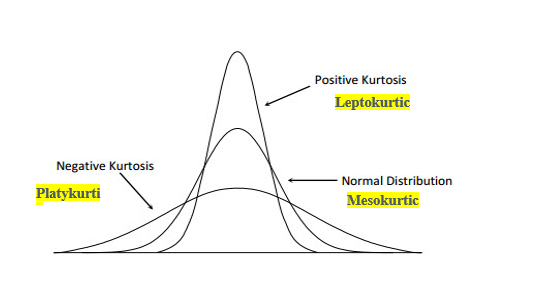

Positive Excess Kurtosis: If the calculated excess kurtosis is greater than 0, it indicates a leptokurtic distribution. In such a distribution, the data points are more peaked and clustered around the mean with fatter tails, suggesting that extreme values are more likely.

Zero Excess Kurtosis: A calculated excess kurtosis of exactly 0 indicates a mesokurtic distribution. This means that the distribution's shape closely resembles that of a standard normal distribution, with a kurtosis equal to 3. The data distribution is neither too peaked (leptokurtic) nor too flat (platykurtic).

Negative Excess Kurtosis: When the excess kurtosis is less than 0, it represents a platykurtic distribution. In a platykurtic distribution, data points are more dispersed and flattened compared to a normal distribution. Extreme values are less likely in such distributions.

### Example of Leptokurtic, Mesokurtic & Platykurtic 

In [19]:
# an array 'x' with 1000 equally spaced values between 0 and 20.
x = np.linspace(0, 20, 1000)
# Setting the 'mean_value' to 10.
mean_value = 10

In [20]:
# the probability density functions (PDFs) for three different distributions.

# leptokurtic PDF using the normal distribution with 'x' values,
# a mean value of 'mean_value', and a standard deviation of 0.5.
leptokurtic_pdf = norm.pdf(x, loc=mean_value, scale=0.5)

# platykurtic PDF using the normal distribution with 'x' values,
# a mean value of 'mean_value', and a larger standard deviation of 3.
platykurtic_pdf = norm.pdf(x, loc=mean_value, scale=3)

# mesokurtic PDF using the normal distribution with 'x' values,
# a mean value of 'mean_value', and a standard deviation of 1.
mesokurtic_pdf = norm.pdf(x, loc=mean_value, scale=1)


In [21]:
#histogram for each distribution

# random data points for a leptokurtic distribution.
# - `np.random.normal` generates random numbers following a normal distribution.
# - `mean_value` is the mean of the distribution.
# - `0.5` is the standard deviation of the distribution, controlling its width.
# - `1000` specifies the number of data points to generate.
leptokurtic_hist = np.random.normal(mean_value, 0.5, 1000)

# random data points for a platykurtic distribution.
# - Similar to the leptokurtic distribution, but with a larger standard deviation of `3`,
#   making it wider and flatter.
platykurtic_hist = np.random.normal(mean_value, 3, 1000)

# random data points for a mesokurtic distribution.
# - Again, similar to the leptokurtic distribution but with a standard deviation of `1`,
#   making it narrower and closer to a standard normal distribution.
mesokurtic_hist = np.random.normal(mean_value, 1, 1000)


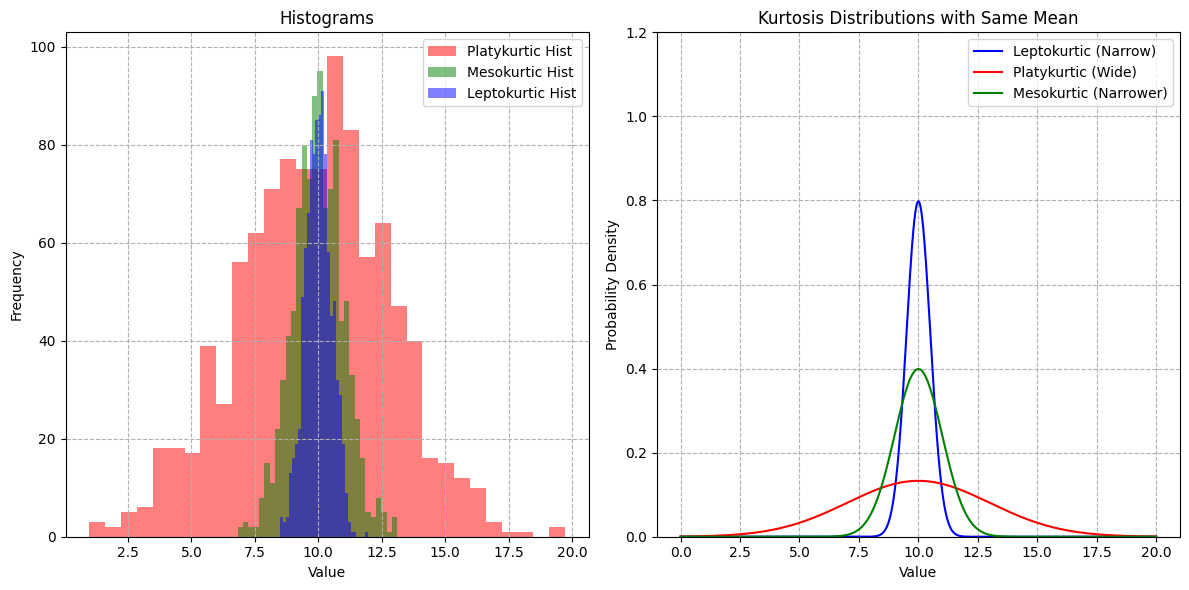

In [22]:
plt.figure(figsize=(12, 6))
# Create a subplot for the histograms
plt.subplot(1, 2, 1)
plt.hist(platykurtic_hist, bins=30, alpha=0.5, color='red', label='Platykurtic Hist')
plt.hist(mesokurtic_hist, bins=30, alpha=0.5, color='green', label='Mesokurtic Hist')
plt.hist(leptokurtic_hist, bins=30, alpha=0.5, color='blue', label='Leptokurtic Hist')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms')
plt.grid(True, linestyle='--')
plt.legend()

# Create a subplot for the PDFs
plt.subplot(1, 2, 2)
plt.plot(x, leptokurtic_pdf, label='Leptokurtic (Narrow)', color='blue')
plt.plot(x, platykurtic_pdf, label='Platykurtic (Wide)', color='red')
plt.plot(x, mesokurtic_pdf, label='Mesokurtic (Narrower)', color='green')
plt.ylim(0, 1.2)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Kurtosis Distributions with Same Mean')
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

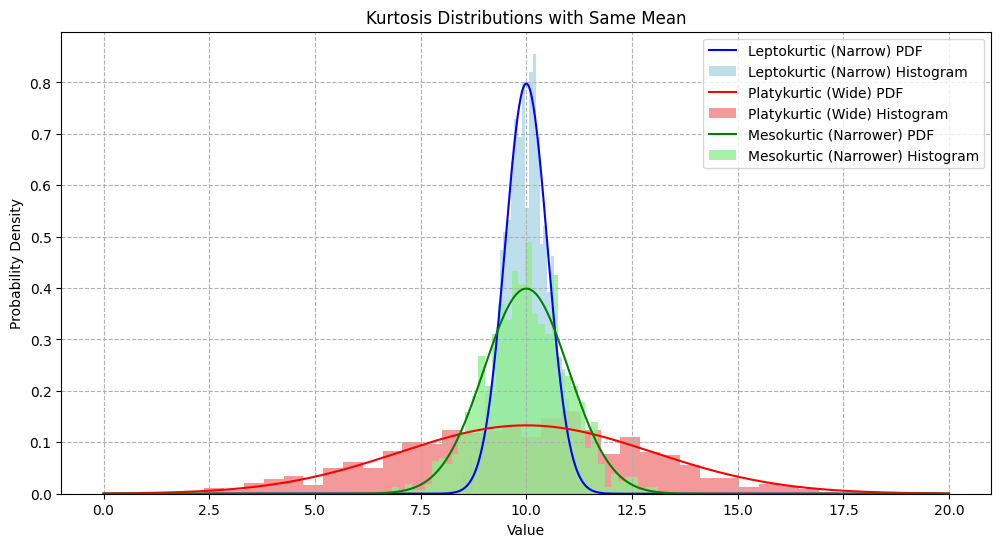

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(x, norm.pdf(x, loc=mean_value, scale=0.5), label='Leptokurtic (Narrow) PDF', color='blue')
plt.hist(leptokurtic_hist, bins=40, density=True, alpha=0.8, color='lightblue', label='Leptokurtic (Narrow) Histogram')
plt.plot(x, norm.pdf(x, loc=mean_value, scale=3), label='Platykurtic (Wide) PDF', color='red')
plt.hist(platykurtic_hist, bins=40, density=True, alpha=0.8, color='lightcoral', label='Platykurtic (Wide) Histogram')
plt.plot(x, norm.pdf(x, loc=mean_value, scale=1), label='Mesokurtic (Narrower) PDF', color='green')
plt.hist(mesokurtic_hist, bins=40, density=True, alpha=0.8, color='lightgreen', label='Mesokurtic (Narrower) Histogram')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Kurtosis Distributions with Same Mean')
plt.grid(True, linestyle='--')
plt.legend()
plt.show()

### Creating random dataset

In [24]:
np.random.seed(0)

In [25]:
# Generate 1000 random numbers from a normal distribution with mean 11 and standard deviation 0.5
data_1 = np.random.normal(loc=11, scale=0.5, size=1000)

# Generate 1000 random numbers from a gamma distribution with shape parameter 3 and scale parameter 2, then add 10
data_2 = np.random.gamma(shape=3, scale=2, size=1000) + 10

# Generate 1000 random numbers from an exponential distribution with scale parameter 1, then add 10
data_3 = np.random.exponential(scale=1, size=1000) + 10

# Generate 1000 random numbers from a standard t-distribution with 3 degrees of freedom, take absolute value, then add 10
data_4 = np.abs(np.random.standard_t(df=3, size=1000)) + 10

# Generate 1000 random numbers from a uniform distribution between 10 and 11
data_5 = np.random.uniform(low=10, high=11, size=1000)

# Left-skewed dataset 
data_6 = -np.random.gamma(shape=2, scale=2, size=1000) + 5

# Left-skewed dataset 
data_7 = -np.random.exponential(scale=2, size=1000) + 5

# Generate the mesokurtic dataset with a gamma distribution
# Generate a dataset with a kurtosis of 0
data_mesokurtic = np.random.normal(loc=0, scale=1, size=1000)
# Adjust the data to make its kurtosis exactly 0
data_8 = data_mesokurtic - 3 * data_mesokurtic.mean()

### Converting random value into structured data frame 

In [26]:
df = pd.DataFrame({
    'Column 1': data_1,
    'Column 2': data_2,
    'Column 3': data_3,
    'Column 4': data_4,
    'Column 5': data_5,
    'Column 6': data_6,
    'Column 7': data_7,
    'column 8': data_8})

In [27]:
df[:20]

Column 1   Column 2   Column 3   Column 4   Column 5  Column 6  Column 7  \
0   11.882026  17.362958  13.184340  11.506686  10.904585 -3.690396  2.225420   
1   11.200079  18.811393  11.704064  12.896647  10.197633  1.160944  1.880299   
2   11.489369  14.069542  11.288183  10.897894  10.397731  2.192692  4.105099   
3   12.120447  15.682690  10.619547  11.438597  10.060969  1.590379  3.513253   
4   11.933779  16.113363  10.528614  11.191326  10.147821  1.497252  3.769731   
5   10.511361  16.018798  11.511174  10.100417  10.587466  2.224800  3.040875   
6   11.475044  17.301623  10.733165  10.846336  10.517133  2.763494  2.382385   
7   10.924321  11.326525  11.080523  10.523442  10.437523  2.345389  0.135962   
8   10.948391  12.687969  10.835156  10.441269  10.716962  0.371341  3.246553   
9   11.205299  22.881483  11.245439  10.133805  10.265907  3.162813  0.347076   
10  11.072022  13.145705  10.098832  10.437575  10.414447  2.076522 -4.899248   
11  11.727137  12.885020  10.474206  10.830384  10.938216  3.123120  3.421855   
12  11.380519  16.066665  10.182829  10.496316  10.567090  3.098149  4.418974   
13  11.060838  15.657193  10.277130  10.566852  10.681433  4.006308  2.942685   
14  11.221932  14.082749  10.224174  11.695238  10.745497  1.752796  2.387318   
15  11.166837  12.491959  10.699814  12.110275  10.446714 -0.928074  2.910185   
16  11.747040  12.595570  10.019176  11.072070  10.430809  2.856126  4.885358   
17  10.897421  12.516901  13.323337  10.173821  10.470204  2.354699  4.581902   
18  11.156534  13.231037  10.731813  10.303876  10.862020  0.828993  4.454850   
19  10.572952  15.795784  10.054004  10.033075  10.363616 -1.389123  4.437867   

    column 8  
0  -0.394642  
1  -1.061189  
2  -0.329017  
3   0.274686  
4  -1.097473  
5  -1.243800  
6  -1.166628  
7  -1.547119  
8   0.475344  
9  -0.192600  
10  1.977629  
11  0.699888  
12 -1.411333  
13 -1.137139  
14  0.224735  
15  0.181356  
16  0.079769  
17 -0.719534  
18 -0.393854  
19  0.902367

In [28]:
columns = df.columns
columns

Index(['Column 1', 'Column 2', 'Column 3', 'Column 4', 'Column 5', 'Column 6',
       'Column 7', 'column 8'],
      dtype='object')

### Kutrosis and Skewness Analysis

In [29]:
kutrosis_analysis = KutrosisCalculator(df, columns).kurtosis()
kutrosis_analysis

Column       Mean     Median            Mode  Standard Deviation  \
0  Column 1  10.977372  10.970986  No unique Mode              0.4938   
1  Column 2  15.929003  15.370208  No unique Mode              3.2443   
2  Column 3  10.911557  10.646563  No unique Mode              0.8819   
3  Column 4  11.050833  10.734772  No unique Mode              1.0893   
4  Column 5  10.494216  10.487476  No unique Mode              0.2912   
5  Column 6   1.270506   1.800906  No unique Mode              2.5400   
6  Column 7   3.084801   3.683263  No unique Mode              1.8802   
7  column 8  -0.064910  -0.035131  No unique Mode              1.0086   

   Skewness  Kurtosis       Kurtosis Description  
0    0.0338   -0.0527        Mesokurtic (Normal)  
1    1.0067    1.2837   Leptokurtic (Fat-Tailed)  
2    1.8142    4.3360   Leptokurtic (Fat-Tailed)  
3    2.6097   10.0610   Leptokurtic (Fat-Tailed)  
4    0.0034   -1.2406  Platykurtic (Thin-Tailed)  
5   -1.3311    2.7618   Leptokurtic (Fat-Tailed)  
6   -1.7707    3.9956   Leptokurtic (Fat-Tailed)  
7   -0.1164    0.0821        Mesokurtic (Normal)

#### Validation of Kutrosis and Skewness of dataset 

In [30]:
#algorithm or class KutosisCalculator validation using scipy
from scipy.stats import kurtosis, skew

In [31]:
for column_name in df.columns:
    skewness_value = skew(df[column_name])
    print(f"{column_name}' Skewness: {skewness_value:.4f}")

Column 1' Skewness: 0.0339
Column 2' Skewness: 1.0082
Column 3' Skewness: 1.8169
Column 4' Skewness: 2.6136
Column 5' Skewness: 0.0034
Column 6' Skewness: -1.3331
Column 7' Skewness: -1.7733
column 8' Skewness: -0.1166


In [32]:
for column_name in df.columns:
    kurtosis_value = df[column_name].kurtosis()
    print(f"Kurtosis for '{column_name}': {kurtosis_value:.4f}")

Kurtosis for 'Column 1': -0.0410
Kurtosis for 'Column 2': 1.3048
Kurtosis for 'Column 3': 4.3785
Kurtosis for 'Column 4': 10.1438
Kurtosis for 'Column 5': -1.2373
Kurtosis for 'Column 6': 2.7933
Kurtosis for 'Column 7': 4.0358
Kurtosis for 'column 8': 0.0947


### Column 1

In [33]:
skewness_calculator = KarlPearsonCoefficient(df, 'Column 1')
skewness_calculator.analyse_skewness()

Mean:  10.977371646254902
Median:  10.970985982600187
Mode:  9.476928472600036
Interpretation of skewness: No skew (symmetric distribution)
Pearson Skewness : 0.038797906442496095


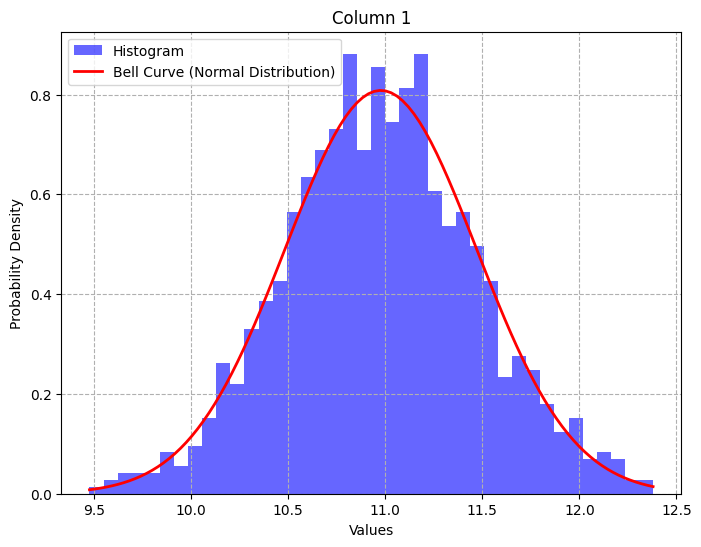

In [34]:
normal_distribution = ProbabilityDensityFunction(df, 'Column 1', 40)
normal_distribution.fit()

### Column 2

In [35]:
skewness_calculator = KarlPearsonCoefficient(df, 'Column 2')
skewness_calculator.analyse_skewness()

Mean:  15.929003415961468
Median:  15.370208133565505
Mode:  10.418156067917955
Interpretation of skewness: Positively skewed
Pearson Skewness : 0.5167199272323826


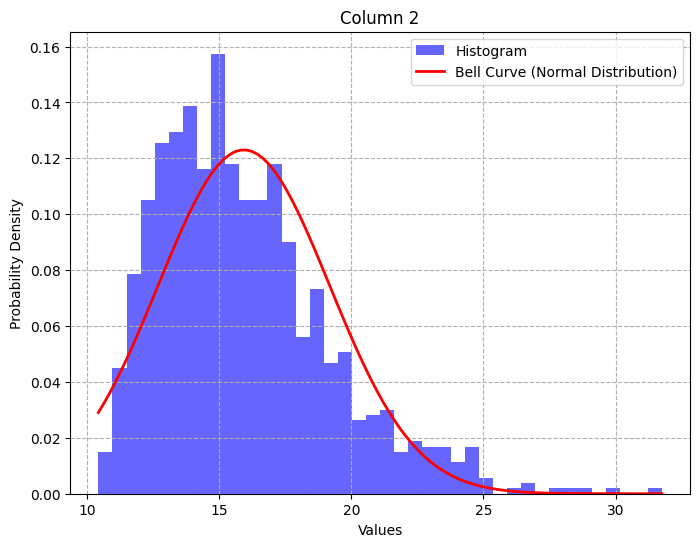

In [36]:
normal_distribution = ProbabilityDensityFunction(df, 'Column 2', 40)
normal_distribution.fit()

### Column 3

In [37]:
skewness_calculator = KarlPearsonCoefficient(df, 'Column 3')
skewness_calculator.analyse_skewness()

Mean:  10.911557380697417
Median:  10.646563490992353
Mode:  10.000072452263094
Interpretation of skewness: Positively skewed
Pearson Skewness : 0.9013922185195441


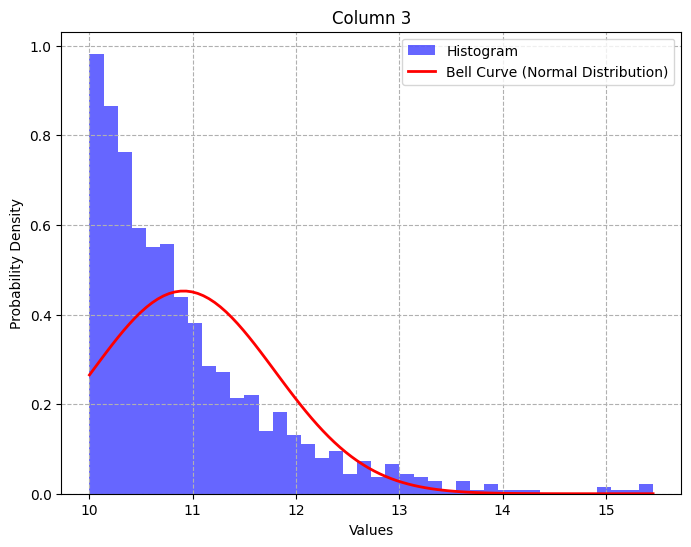

In [38]:
normal_distribution = ProbabilityDensityFunction(df, 'Column 3', 40)
normal_distribution.fit()

### Column 4

In [39]:
skewness_calculator = KarlPearsonCoefficient(df, 'Column 4')
skewness_calculator.analyse_skewness()

Mean:  11.05083298066621
Median:  10.734772117137542
Mode:  10.002291431306498
Interpretation of skewness: Positively skewed
Pearson Skewness : 0.8704372997399269


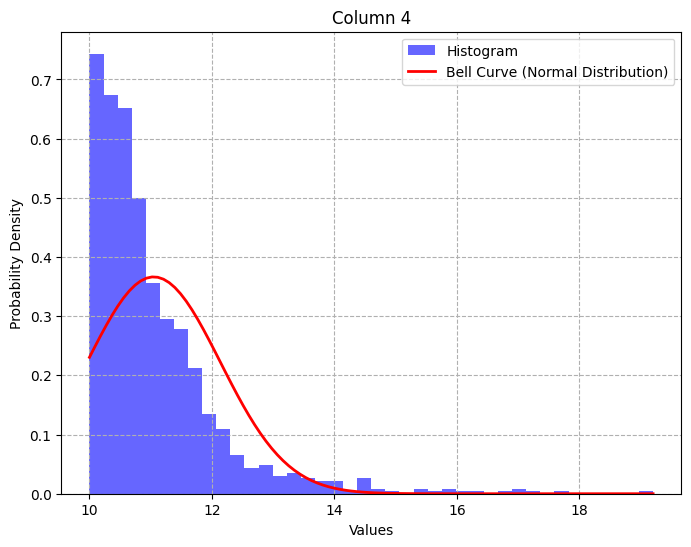

In [40]:
normal_distribution = ProbabilityDensityFunction(df, 'Column 4', 40)
normal_distribution.fit()

### Column 5

In [41]:
skewness_calculator = KarlPearsonCoefficient(df, 'Column 5')
skewness_calculator.analyse_skewness()

Mean:  10.49421636523854
Median:  10.487476387464348
Mode:  10.000253842712024
Interpretation of skewness: No skew (symmetric distribution)
Pearson Skewness : 0.06943277019956277


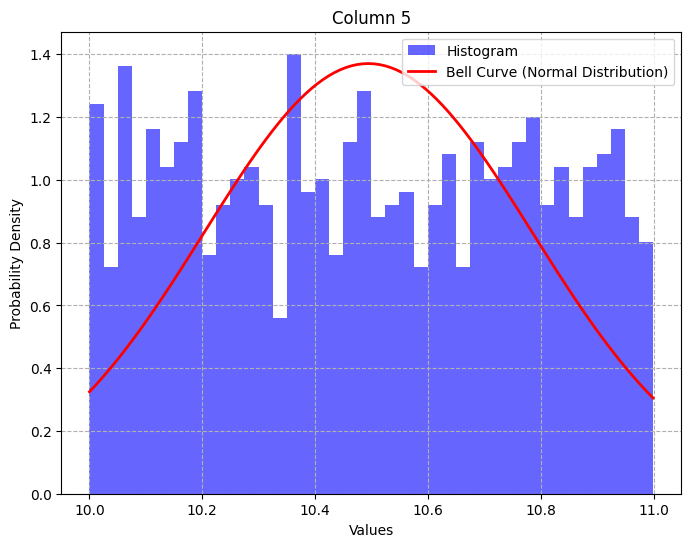

In [42]:
normal_distribution = ProbabilityDensityFunction(df, 'Column 5', 40)
normal_distribution.fit()

### Column 6

In [43]:
skewness_calculator = KarlPearsonCoefficient(df, 'Column 6')
skewness_calculator.analyse_skewness()

Mean:  1.2705056066727964
Median:  1.80090576347121
Mode:  -15.404704447487806
Interpretation of skewness: Negatively skewed
Pearson Skewness : -0.6264534721867098


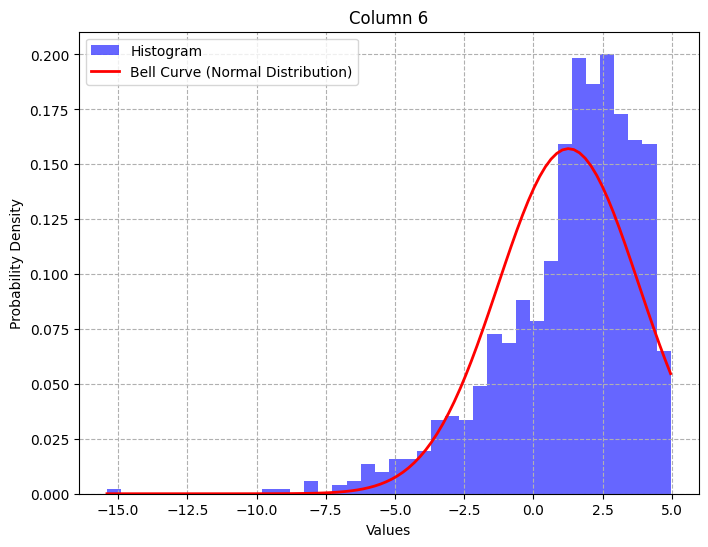

In [44]:
normal_distribution = ProbabilityDensityFunction(df, 'Column 6', 40)
normal_distribution.fit()

### Column 7

In [45]:
skewness_calculator = KarlPearsonCoefficient(df, 'Column 7')
skewness_calculator.analyse_skewness()

Mean:  3.084801267926706
Median:  3.6832628435245702
Mode:  -7.442491326266614
Interpretation of skewness: Negatively skewed
Pearson Skewness : -0.9549074086411169


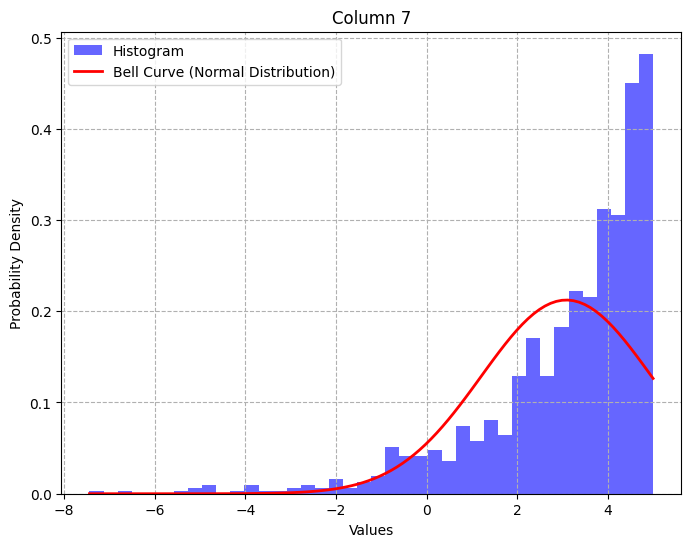

In [46]:
normal_distribution = ProbabilityDensityFunction(df, 'Column 7', 40)
normal_distribution.fit()

### Column 8

In [47]:
skewness_calculator = KarlPearsonCoefficient(df, 'column 8').analyse_skewness()
skewness_calculator

Mean:  -0.06490964385652973
Median:  -0.035131201020974626
Mode:  -3.3725338746667397
Interpretation of skewness: No skew (symmetric distribution)
Pearson Skewness : -0.08857634867214306


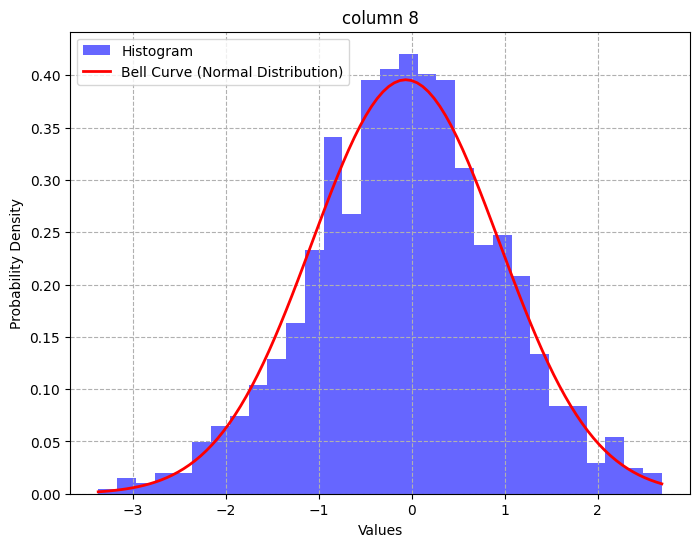

In [48]:
pdf = ProbabilityDensityFunction(df, 'column 8')
pdf.fit()

### REFERENCES:

AnalystPrep: "Kurtosis." (https://analystprep.com/cfa-level-1-exam/quantitative-methods/kurtosis/)

StatisticsHowTo: "Kurtosis: Leptokurtic, Mesokurtic, Platykurtic." (https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/kurtosis-leptokurtic-platykurtic/)

Wolfram MathWorld: "Pearson's Skewness Coefficients." (https://mathworld.wolfram.com/PearsonsSkewnessCoefficients.html)

SlideShare: "Skewness" by Rajkumar Teotia. (https://www.slideshare.net/rajkumarteotia/skewness-40437601)

SAS Blogs: "A Quantile Definition of Skewness." (https://blogs.sas.com/content/iml/2017/07/19/quantile-skewness.html)

Wikipedia: "Gamma Distribution." (https://en.wikipedia.org/wiki/Gamma_distribution)

Towards Data Science: "Gamma Distribution: Intuition, Derivation, and Examples." (https://towardsdatascience.com/gamma-distribution-intuition-derivation-and-examples-55f407423840)

QuantInsti: "Kurtosis - The Fourth Statistical Moment." (https://blog.quantinsti.com/kurtosis/)

ExcelTip: "How to Use the GAMMA.DIST Function in Excel." (https://www.exceltip.com/excel-functions/how-to-use-the-gamma-dist-function-in-excel.html)

Oregon State University: "Skew." (https://streamflow.engr.oregonstate.edu/analysis/floodfreq/skew.htm)


### Youtube Channel: https://www.youtube.com/@AnalyticalHarry/videos

### Github: https://github.com/analyticalharry